In [1]:
import numpy as np 
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('Fruit Prices 2022.csv')
data.head(2)

,Fruit,Form,RetailPrice,RetailPriceUnit,Yield,CupEquivalentSize,CupEquivalentUnit,CupEquivalentPrice
0,Apples,Fresh,1.8541,per pound,0.9,0.2425,pounds,0.4996
1,"Apples, applesauce",Canned,1.1705,per pound,1.0,0.5401,pounds,0.6323


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Fruit               62 non-null     object 
 1   Form                62 non-null     object 
 2   RetailPrice         62 non-null     float64
 3   RetailPriceUnit     62 non-null     object 
 4   Yield               62 non-null     float64
 5   CupEquivalentSize   62 non-null     float64
 6   CupEquivalentUnit   62 non-null     object 
 7   CupEquivalentPrice  62 non-null     float64
dtypes: float64(4), object(4)
memory usage: 4.0+ KB


In [4]:
print(data['Fruit'].nunique())
print(data['Form'].nunique())
print(data['RetailPriceUnit'].nunique())
print(data['CupEquivalentUnit'].nunique())      
      

53
5
2
2


In [5]:
print(data['RetailPriceUnit'].unique())

print(data['RetailPriceUnit'].unique())

['per pound' 'per pint']
['per pound' 'per pint']


In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in ['Fruit','Form','RetailPriceUnit','CupEquivalentUnit']:
    data[i] = le.fit_transform(data[i])

In [7]:
data.head(2)

,Fruit,Form,RetailPrice,RetailPriceUnit,Yield,CupEquivalentSize,CupEquivalentUnit,CupEquivalentPrice
0,0,2,1.8541,1,0.9,0.2425,1,0.4996
1,1,0,1.1705,1,1.0,0.5401,1,0.6323


In [8]:
for i in ['RetailPrice','CupEquivalentSize','Yield','CupEquivalentPrice']:
    data[i] = data[i].astype('int32')

In [9]:
data

,Fruit,Form,RetailPrice,RetailPriceUnit,Yield,CupEquivalentSize,CupEquivalentUnit,CupEquivalentPrice
0,0,2,1,1,0,0,1,0
1,1,0,1,1,1,0,1,0
2,3,4,0,0,1,8,0,0
3,2,4,0,0,1,8,0,0
4,4,2,3,1,0,0,1,1
...,...,...,...,...,...,...,...,...
57,50,2,7,1,0,0,1,2
58,50,3,6,1,1,0,1,2
59,51,2,2,1,0,0,1,1
60,51,3,3,1,1,0,1,1


In [10]:
print(data['Fruit'].nunique())
print(data['Form'].nunique())
print(data['RetailPriceUnit'].nunique())
print(data['CupEquivalentUnit'].nunique()) 
print(data['Yield'].nunique())
print(data['CupEquivalentSize'].nunique())
print(data['RetailPrice'].nunique()) 

53
5
2
2
2
2
9


In [11]:
data.dtypes

Fruit                 int32
Form                  int32
RetailPrice           int32
RetailPriceUnit       int32
Yield                 int32
CupEquivalentSize     int32
CupEquivalentUnit     int32
CupEquivalentPrice    int32
dtype: object

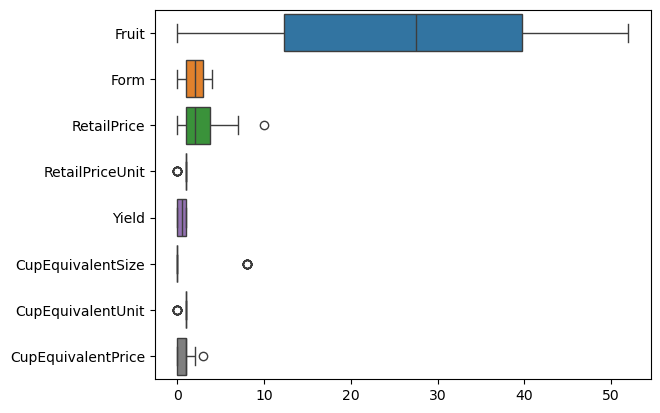

In [12]:
sns.boxplot(data=data,orient='h')
plt.show();

In [13]:
def wisker(col):
    q1,q3=np.percentile(col,[10,80])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw

In [14]:
data.columns

Index(['Fruit', 'Form', 'RetailPrice', 'RetailPriceUnit', 'Yield',
       'CupEquivalentSize', 'CupEquivalentUnit', 'CupEquivalentPrice'],
      dtype='object')

In [15]:
for i in [['Form', 'RetailPrice', 'RetailPriceUnit', 'Yield', 'CupEquivalentSize', 'CupEquivalentUnit', 'CupEquivalentPrice']]:
    lw,uw=wisker(data[i])
    data[i]=np.where(data[i]<lw,lw,data[i])
    data[i]=np.where(data[i]>uw,uw,data[i])

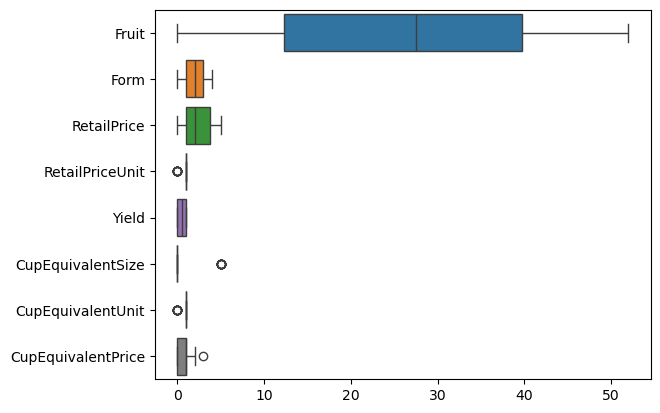

In [16]:
sns.boxplot(data=data,orient='h')
plt.show();

In [17]:
import optuna

In [18]:
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor
GBR = GradientBoostingRegressor()
GBC = GradientBoostingClassifier()

In [19]:
X_c = data.drop('RetailPriceUnit',axis=1)
y_c = data['RetailPriceUnit']
X_r = data.drop('RetailPrice',axis=1)
y_r = data['RetailPrice']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_c_train,X_c_test,y_c_train,y_c_test = train_test_split(X_c,y_c,test_size=0.2)
X_r_train,X_r_test,y_r_train,y_r_test = train_test_split(X_r,y_r,test_size=0.2)

In [22]:
GBR.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [23]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'loss': ['linear', 'square', 'exponential']
}

grid_search = GridSearchCV(
    GradientBoostingClassifier(),
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
grid_search.fit(X_c_train, y_c_train)
print(grid_search.best_params_)

{'learning_rate': 0.01, 'loss': 'exponential', 'n_estimators': 100}


In [24]:
GBC = GradientBoostingClassifier(learning_rate= 0.01, loss= 'exponential', n_estimators= 100)
GBC.fit(X_c_train,y_c_train)

GradientBoostingClassifier(learning_rate=0.01, loss='exponential')

In [25]:
y_pred = GBC.predict(X_c_test)
y_pred

array([1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [26]:
pred = GBC.predict(X_c_train)
pred

array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1.])

In [27]:
from sklearn.metrics import accuracy_score,r2_score,confusion_matrix,classification_report,mean_absolute_error,mean_squared_error

In [28]:
print('testing accuracy')
print(accuracy_score(y_c_test,y_pred))
print("==============================")
print('training accuracy')
print(accuracy_score(y_c_train,pred))
print("==============================")
print('confusion matrix')
print(confusion_matrix(y_c_test,y_pred))
print("==============================")
print('classification report')
print(classification_report(y_c_test,y_pred))

testing accuracy
1.0
training accuracy
1.0
confusion matrix
[[ 1  0]
 [ 0 12]]
classification report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         1
         1.0       1.00      1.00      1.00        12

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13



In [29]:
GBC = GradientBoostingRegressor(learning_rate= 0.01, loss= 'exponential', n_estimators= 100)
GBR.fit(X_r_train,y_r_train)

GradientBoostingRegressor()

In [30]:
y_pred = GBR.predict(X_r_test)
y_pred

array([ 5.21766045,  0.87889496,  4.72445832,  3.6803937 ,  0.13543809,
        1.80873224,  2.04928659,  0.75991541, -0.35784126,  2.16568702,
        2.80784732,  0.43361741,  0.76650849])

In [31]:
pred = GBR.predict(X_r_train)
pred

array([ 5.04700878,  0.38822439,  0.1488315 ,  1.76588673,  0.04993043,
        1.21692722,  3.84781405,  1.8872376 ,  4.79946281,  4.9709901 ,
        1.79002785,  1.12971343,  2.90929061,  2.02191039, -0.02681201,
        3.1448031 ,  1.80873224,  0.87889496,  5.07355031,  1.08101927,
        1.25226188,  1.93049998,  2.04725845,  1.92255541,  4.88854385,
        3.92346773,  3.22009631,  1.49204887,  4.92316281, -0.02681201,
        2.20044577,  3.84781405,  2.04016679,  2.95146508,  0.9680171 ,
        0.13543809,  4.93598855,  4.8668423 ,  1.19124298,  0.9493614 ,
        4.88854385,  3.4161785 ,  3.52175154,  0.22657191,  3.06180202,
        1.16320903,  0.05668165,  2.04257464,  1.02937775])

In [32]:
print(r2_score(y_r_test,y_pred))
print("====================")
print(r2_score(y_r_train,pred))
print("====================")
print(mean_absolute_error(y_r_test,y_pred))
print("====================")
print(mean_squared_error(y_r_test,y_pred))

0.7869372524073404
0.9873242714884378
0.6758168012091278
0.6227988006554668


In [33]:
data = pd.read_csv('Fruit Prices 2022.csv')
data

,Fruit,Form,RetailPrice,RetailPriceUnit,Yield,CupEquivalentSize,CupEquivalentUnit,CupEquivalentPrice
0,Apples,Fresh,1.8541,per pound,0.90,0.2425,pounds,0.4996
1,"Apples, applesauce",Canned,1.1705,per pound,1.00,0.5401,pounds,0.6323
2,"Apples, ready-to-drink",Juice,0.8699,per pint,1.00,8.0000,fluid ounces,0.4349
3,"Apples, frozen concentrate",Juice,0.6086,per pint,1.00,8.0000,fluid ounces,0.3043
4,Apricots,Fresh,3.6162,per pound,0.93,0.3638,pounds,1.4145
...,...,...,...,...,...,...,...,...
57,Raspberries,Fresh,7.7338,per pound,0.96,0.3197,pounds,2.5753
58,Raspberries,Frozen,6.1590,per pound,1.00,0.3307,pounds,2.0368
59,Strawberries,Fresh,2.9682,per pound,0.94,0.3197,pounds,1.0094
60,Strawberries,Frozen,3.3421,per pound,1.00,0.3307,pounds,1.1052


In [34]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.ensemble import AdaBoostClassifier,AdaBoostRegressor,GradientBoostingClassifier,GradientBoostingRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from xgboost import XGBClassifier,XGBRegressor
from sklearn.model_selection import train_test_split

In [35]:
data.dtypes

Fruit                  object
Form                   object
RetailPrice           float64
RetailPriceUnit        object
Yield                 float64
CupEquivalentSize     float64
CupEquivalentUnit      object
CupEquivalentPrice    float64
dtype: object

In [36]:
for i in ['RetailPriceUnit']:
    data[i] = le.fit_transform(data[i])
    

In [37]:
for i in ['RetailPrice']:
    data[i] = data[i].astype('int64')

In [38]:
data.dtypes

Fruit                  object
Form                   object
RetailPrice             int64
RetailPriceUnit         int32
Yield                 float64
CupEquivalentSize     float64
CupEquivalentUnit      object
CupEquivalentPrice    float64
dtype: object

In [39]:
num = data.select_dtypes(include=['int32','int64','float64']).columns
num

Index(['RetailPrice', 'RetailPriceUnit', 'Yield', 'CupEquivalentSize',
       'CupEquivalentPrice'],
      dtype='object')

In [40]:
num = num.drop(['RetailPrice','RetailPriceUnit'])
num

Index(['Yield', 'CupEquivalentSize', 'CupEquivalentPrice'], dtype='object')

In [41]:
cat = data.select_dtypes(include='object').columns

In [42]:
num_pipe = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median'))])


cat_pipe = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('ohe',OneHotEncoder( handle_unknown='ignore'))])

prep_pipe = ColumnTransformer(transformers=[
    ('num',num_pipe,num),
    ('cat',cat_pipe,cat)])

reg = {
    'AdaBoost':AdaBoostRegressor(random_state=42),
    'GradiantBoosting':GradientBoostingRegressor(random_state=42),
    'knn_rg':KNeighborsRegressor(n_neighbors=5,metric='l2'),
    'DTR':DecisionTreeRegressor()}


cls = {
    'AdaBoost':AdaBoostClassifier(random_state=42),
    'GradiantBoosting':GradientBoostingClassifier(random_state=42),
    'LR':LogisticRegression(),
    'knn_cl':KNeighborsClassifier(n_neighbors=5,metric='l2'),
    'DTC':DecisionTreeClassifier(),}

In [43]:
X_c = data.drop('RetailPriceUnit',axis=1)
y_c = data['RetailPriceUnit']
X_r = data.drop('RetailPrice',axis=1)
y_r = data['RetailPrice']

In [44]:
X_c_train,X_c_test,y_c_train,y_c_test = train_test_split(X_c,y_c,test_size=0.2)
X_r_train,X_r_test,y_r_train,y_r_test = train_test_split(X_r,y_r,test_size=0.2)

In [45]:
cat

Index(['Fruit', 'Form', 'CupEquivalentUnit'], dtype='object')

In [46]:
num

Index(['Yield', 'CupEquivalentSize', 'CupEquivalentPrice'], dtype='object')

In [47]:
for name,model in cls.items():
    print('=======')
    pipe = Pipeline(steps=[
    ('preprocessor',prep_pipe),
    ('model',model)
    ])
    pipe.fit(X_c_train,y_c_train)
    print('Fitting for',name,'Classifier')
    y_pred = pipe.predict(X_c_test)
    rmse = np.sqrt(mean_squared_error(y_c_test,y_pred))
    acc = accuracy_score(y_c_test,y_pred)
    print(f'{name}_rmse = {rmse}')
    print(f'{name}_acc = {acc}')
    print('______________________\n')
    

Fitting for AdaBoost Classifier
AdaBoost_rmse = 0.0
AdaBoost_acc = 1.0
______________________

Fitting for GradiantBoosting Classifier
GradiantBoosting_rmse = 0.0
GradiantBoosting_acc = 1.0
______________________

Fitting for LR Classifier
LR_rmse = 0.0
LR_acc = 1.0
______________________

Fitting for knn_cl Classifier
knn_cl_rmse = 0.0
knn_cl_acc = 1.0
______________________

Fitting for DTC Classifier
DTC_rmse = 0.0
DTC_acc = 1.0
______________________



In [48]:
for name,model in reg.items():
    print('=======')
    pipe = Pipeline(steps=[
    ('preprocessor',prep_pipe),
    ('model',model)
    ])
    pipe.fit(X_r_train,y_r_train)
    print('Fitting for',name,'Regressor')
    y_pred = pipe.predict(X_r_test)
    rmse = np.sqrt(mean_squared_error(y_r_test,y_pred))
    r2 = r2_score(y_r_test,y_pred)
    print(f'{name}_rmse = {rmse}')
    print(f'{name}_r2 = {r2}')
    print('______________________\n')
    

Fitting for AdaBoost Regressor
AdaBoost_rmse = 1.0289721598117854
AdaBoost_r2 = 0.8516298123898454
______________________

Fitting for GradiantBoosting Regressor
GradiantBoosting_rmse = 0.530576088903426
GradiantBoosting_r2 = 0.9605511138858926
______________________

Fitting for knn_rg Regressor
knn_rg_rmse = 0.9703290480751678
knn_rg_r2 = 0.8680597014925373
______________________

Fitting for DTR Regressor
DTR_rmse = 0.5547001962252291
DTR_r2 = 0.956882255389718
______________________



In [62]:
pipe = Pipeline(steps=[
('preprocessor',prep_pipe),
('model',DecisionTreeRegressor())
])
pipe.fit(X_r_train,y_r_train)
y_pred = pipe.predict(X_r_test)
r2 = r2_score(y_r_test,y_pred) 
rmse = mean_squared_error(y_r_test,y_pred)
mae = mean_absolute_error(y_r_test,y_pred)
print(f'{name}_r2r2_score = {r2}')
print(f'{name}_mmean_squared_error = {rmse}')
print(f'{name}_memean_absolute_error = {mae}')
print('______________________\n')

DTR_r2r2_score = 0.8786936236391912
DTR_mmean_squared_error = 0.9230769230769231
DTR_memean_absolute_error = 0.46153846153846156
______________________



In [63]:
from sklearn.metrics import classification_report

In [65]:
pipe = Pipeline(steps=[
('preprocessor',prep_pipe),
('model',DecisionTreeClassifier())
])
pipe.fit(X_c_train,y_c_train)
y_pred = pipe.predict(X_c_test)
acc = accuracy_score(y_c_test,y_pred) 
cr = classification_report(y_c_test,y_pred) 
print(f'{name}_accuracy = {acc}')
print(f'{name}_cr = {cr}')
print('______________________\n')

DTR_accuracy = 1.0
DTR_cr =               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         8

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13

______________________



In [11]:
import pickle
with open("fruits_model.pkl", "wb") as file:
    pickle.dump(2022, file)

print("✅ Model saved!")

✅ Model saved!
